# Projet optimisation de la trajectoire d'un robot

# Partie 1

### Question 1

Les inconnues du problème sont les poses $Pi$ de la trajectoire. On pose $P_{i}=(x_{i},y_{i},\theta_{i})$ avec $x_i,y_i,\theta_i$ définis pour $i$ allant de $0$ à $n$ par rapport à un repère fixe ayant pour origine $P_0 = (0,0,0)$.

On cherche à les déterminer grâce aux relations d'odométrie et de fermeture de boucles qui elles sont connues.


### Question 2

Chaque relation d'odométrie est donnée relativement à la pose précédente. 
On a donc les relations suivantes pour l'odométrie : 

$$
\left\{
    \begin{array}{ll}
        x_{i+1} = x_i + dx_i\cos{\theta_i}- dy_i\sin{}\theta_i = f_{x}(x_{i},dx_{i},dy_{i},\theta_{i})\\
        y_{i+1} = y_i + dx_i\sin{\theta_i}+ dy_i\cos{}\theta_i = f_{y}(y_{i},dx_{i},dy_{i},\theta_{i})\\
        \theta_{i+1} = \theta_i + d\theta_i = f_{\theta}(\theta_{i},d\theta_{i})
    \end{array}
\right.
$$

Et on adapte pour les relations de fermetures de boucle en remplaçant $i+1$ par $j$ avec $j$ l'indice de la fermeture de boucle. 

### Question 3

On veut ici déterminer quelle fonction minimiser afin de vérifier au mieux les données d'odométrie et de fermetures de boucles. On va d'abord introduire plusieurs notations.

On va travailler ici avec des fonctions $f_{x}, f_{y} et f_{\theta}$ définies respectivement par les relations données en question 2 s'appliquant sur les variables $x_{i}, y_{i}$ et $\theta_{i}$. De plus, les éléments que nous appelerons $dx_{i},dy_{i}$ et $d\theta_{i}$ ainsi que $dx'_{i},dy'_{i}$ et $d\theta'_{i}$ dans la suite correspondent respectivement aux valeurs d'odométrie et de fermeture de boucles mesurées par le robot lors de son parcours, et sont donc connues et fixées.

Ce faisant, on note $P_{i}=(x_{i},y_{i},\theta_{i})$ un triplet de $R^{3}$ et M le vecteur de dimension 3n définit par $M=(P_{i})_{1 \leqslant i \leqslant n}$. 

Si M est un minimum de notre fonction, on veut que chacun des $p_{i}$ vérifie au mieux les relations d'odométrie et de fermetures de boucles, c'est-à-dire:

1) $\forall i \in {1,...,n}$,
$x_{i+1}\approx f_{x}(x_{i},dx_{i},dy_{i},\theta_{i})$,
$y_{i+1}\approx f_{y}(y_{i},dx_{i},dy_{i},\theta_{i})$,
$\theta_{i+1}\approx f_{\theta}(\theta_{i},d\theta_{i})$.

2) Si l'on note B l'ensemble des couples (j,i) correspondant à des fermetures de boucles détectées par le robot, on veut également vérifier: $x_{j}\approx f_{x}(x_{i},dx'_{i},dy'_{i},\theta_{i})$, 
$y_{j}\approx f_{y}(y_{i},dx'_{i},dy'_{i},\theta_{i})$ et
$\theta_{j}\approx f_{\theta}(\theta_{i},d\theta'_{i})$.

Plus concrètement, ces approximations se traduisent par le fait que les quantités $\left|x_{i+1}- f_{x}(x_{i},dx_{i},dy_{i},\theta_{i}) \right|^{2}$ soient le plus petites possibles, de même en remplaçant les $x$ par les $y$ et les $\theta$, et de même pour les relations de fermeture de boucle.

Comme on veut que cela soit vrai pour toutes ces relations, et que celles-ci sont interdépendantes, cela revient à minimiser la fonction de $R^{3n}$ suivante:

 $M \in R^{3n} \rightarrow \sum_{i=1}^{n} \left\|P_{i+1} - F(P_{i},dx_{i},dy_{i},d\theta_{i}) \right\|^{2} + \sum_{(j,i) \in B} \left\|P_{j} - F(P_{i},dx'_{i},dy'_{i},d\theta'_{i}) \right\|^{2}$ 

où les $P_{i}$ ont été définis ci-dessus comme les triplets composants de M et où $F(P_{i},dx_{i},dy_{i},d\theta_{i})=(f_{x}(x_{i},dx_{i},dy_{i},\theta_{i}),f_{y}(y_{i},dx_{i},dy_{i},\theta_{i}),f_{\theta}(\theta_{i},d\theta_{i}))$. 

# Partie 2

In [22]:
import time
import matplotlib.pyplot as plt
import autograd.numpy as np
import autograd
import copy
import scipy.optimize
from math import cos, sin, pi, sqrt

### Question 1

In [43]:
donnees_odo = []
donnees_loop = []

def recup_donnees(fichier):
    with open(fichier, 'r') as intel:
        for ligne in intel:
            l = ligne.split()
            for i in range(1,len(l)):
                l[i]=float(l[i])
            if l[0]=="EDGE_ODO":
                donnees_odo.append(l[1:3]+[l[3:]])
            else:
                donnees_loop.append(l[1:3]+[l[3:]])
                
recup_donnees("INTEL.txt")
np.array(donnees_loop)


array([[array(19.), array(166.),
        array([-2.459689,  0.241111,  0.2528  ])],
       [array(19.), array(172.), array([1.067903, 0.915786, 0.14947 ])],
       [array(25.), array(172.),
        array([-2.539634,  0.85263 , -0.02986 ])],
       [array(25.), array(178.),
        array([ 1.225223,  0.672079, -0.10248 ])],
       [array(32.), array(178.),
        array([-2.020007, -0.239771,  0.71518 ])],
       [array(32.), array(183.),
        array([-0.092559,  0.424181,  0.0416  ])],
       [array(44.), array(189.),
        array([-2.265706, -0.570857,  0.19772 ])],
       [array(44.), array(195.),
        array([ 1.302289, -0.133004, -0.00528 ])],
       [array(50.), array(195.),
        array([-2.374379, -0.253682,  0.21612 ])],
       [array(50.), array(201.),
        array([ 1.291572,  0.086248, -0.0507  ])],
       [array(50.), array(203.),
        array([ 2.550695,  0.035722, -0.08465 ])],
       [array(61.), array(203.),
        array([-2.852494,  0.122053,  0.07787 ])],
   

### Question 2

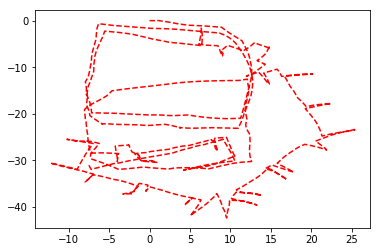

In [44]:
def estim_trajectoire(odometrie):
    liste_x = [0]
    liste_y = [0]
    liste_theta = [0]
    for i in range(len(odometrie)):
        p_i = np.array([liste_x[-1], liste_y[-1], liste_theta[-1]])
        di = np.array(odometrie[i][2])
        rot = np.array([[cos(p_i[2]), -sin(p_i[2]), 0], [sin(p_i[2]),cos(p_i[2]), 0], [0, 0, 1]])
        p_i = p_i + np.dot(rot, di)
        liste_x.append(p_i[0])
        liste_y.append(p_i[1])
        liste_theta.append(p_i[2])
    return liste_x, liste_y, liste_theta

x, y, t = estim_trajectoire(donnees_odo)
plt.figure()
plt.plot(x, y, 'r--')
plt.show()
        


### Question 3

#### Convexité de la fonction

Interessons nous d'abord à la convexité de la fonction. Comme celle-ci contient des cosinus et sinus en fonction des variables $\theta$ de chaque pose, on sent que la fonction ne sera pas convexe. Un moyen de vérifier qu'elle ne l'est pas est de faire varier simplement le $\theta$ d'une seule pose et de tracer l'allure de la courbe que l'on obtient.

In [45]:
#Definition de la fonction à minimiser f_minim en trois étapes

def F(p_i,di):
    rot = np.array([[np.cos(p_i[2]), -np.sin(p_i[2]), 0], [np.sin(p_i[2]),np.cos(p_i[2]), 0], [0, 0, 1]])
    p_i = p_i + np.dot(rot, np.array(di))
    return p_i
    
def norme_carree(X):
    return sum(X[i]**2 for i in range(len(X)))
    
def f_minim_pose(P,i):
    """C'est la fonction qui calcule les termes de la somme où intervient uniquement la pose Pi"""
    
    #Partie odométrie
    p_i=np.array(P[i])
    pi_1=np.array(P[i+1])
    relations_odo=[]
    if i<len(donnees_odo):
        relations_odo = donnees_odo[i]
    diff_o=pi_1-F(p_i,np.array(relations_odo[2]))
    a=norme_carree(diff_o)

    #Partie loop
    relations_loop = [relation for relation in donnees_loop if relation[0]==i] #Pas les relations où i est le deuxième indice pour ne pas compter les relations 2 fois
    indexes_loop = [int(relation[1]) for relation in relations_loop]
    Pj=[np.array(P[j]) for j in indexes_loop] #Les poses qui ont des relations de fermeture de boucle avec la pose Pi
    for k in range(len(relations_loop)):
        diff=Pj[k]-F(p_i,np.array(relations_loop[k][2]))
        a+=norme_carree(diff)
    return a

def f_minim(P):
    P=np.array([[P[3*i],P[3*i+1],P[3*i+2]] for i in range(int(len(P)/3))]) #On passe le vectur en version matricielle [[x1,y1,theta1],...,[xn,yn,thetan]] pour utiliser la fonction précédente
    return sum([f_minim_pose(P,i) for i in range(len(donnees_odo))])


#Vecteur de R^3n correspondant à l'estimation précédente
P=[]
for i in range(len(x)):
    P.append(x[i])
    P.append(y[i])
    P.append(t[i])
P=np.array(P)
    
#Variation de theta de la pose k
k=19
print(f_minim(P))
print(np.linalg.norm(P))
print(np.sqrt(norme_carree(P)))

"""liste_theta=np.linspace(-3*pi,3*pi,300)
liste_f=[]
for i in range(300):
    P[3*k+2]=liste_theta[i]
    liste_f.append(f_minim(P))
    
plt.figure()
plt.plot(liste_theta, liste_f, 'b--')
plt.title("Fonction à minimiser")


plt.show()"""

609595.6753715187
1770.1931478963636
1770.1931478963618


'liste_theta=np.linspace(-3*pi,3*pi,300)\nliste_f=[]\nfor i in range(300):\n    P[3*k+2]=liste_theta[i]\n    liste_f.append(f_minim(P))\n    \nplt.figure()\nplt.plot(liste_theta, liste_f, \'b--\')\nplt.title("Fonction à minimiser")\n\n\nplt.show()'

On voit donc que la fonction n'est pas convexe. 

#### Existence et unicité de la solution

De plus, sur cet exemple, on a un minimum atteint pour deux valeurs de $\theta$ différentes, ce qui peut supposer qu'il soit possible d'obtenir le même résultat pour un vecteur P qui minimise la fonction. Si ce n'est pas le cas pour tout jeu de données d'entrée (s'il n'y a que des relations d'odométrie, il y'a unicité de la solution par exemple), on peut trouver des jeux de données qui ont plusieurs solutions. Pour plus de détails, des démonstrations moins qualitatives sont en pièce jointe.

L'existence de la solution se justifie par le caractère fermé borné de l'espace dans lequel on cherche nos solutions, qui n'est pas $R^{3n}$ tout entier mais restreint par les dimensions du laboratoire selon x et y. Pour les theta, l'espace dans lequel on les cherche est au plus [0,2n$\pi]^{n}$ car tous les d$\theta$ appartiennent à [0,2$\pi$].

#### Conditionnement

Calculons désormais le conditionnement du problème, c'est-à-dire la sensibilité relative de la fonction f par rapport à une légère variation spatiale du point en laquelle on l'évalue. On va donc calculer $\frac{\|f(x)-f(x+\delta)\|}{\|f(x)_\| \epsilon}$


In [5]:
epsilon=10**(-16)
m=10
n=3*(len(donnees_odo)+1)

def conditionnement(f,liste,epsilon,deplacement):
    l=[]
    for x in liste:
        k=abs((f(np.array(x)+np.array(deplacement))-f(x))/f(x))*1/epsilon
        l.append(k)
    return l

def normalise(x):
    norm=np.linalg.norm(np.array(x))
    n=len(x)
    for i in range(n):
        x[i]=x[i]/norm
    return x

from random import uniform

#on crée des vecteurs de façon aléatoire de norme variant de 1 à 100 afin de déterminer la valeur de k et se cantonner à un espace borné, comme le laboratoire
liste=[normalise([uniform(-i,i) for k in range(n)]) for i in range (1,100)]
p=len(liste)
for i in range(p):
    for j in range(n):
        liste[i][j]=liste[i][j]*(i+1)


#print([[f_minim(vecteur+deplacement),f_minim(vecteur)] for vecteur in liste])


deplacement=[uniform(-1,1)*epsilon for k in range(n)] #on crée un déplacement de façon aléatoire et plus petit que $\espilon$ en valeur absolue pour chaque composante

"""X=liste[0]
print(np.array(deplacement))
print(np.array(X))
print(np.array(liste[0])+np.array(deplacement))
"""

l=conditionnement(f_minim,liste,epsilon,deplacement)
print(l)

k=sum(l)/len(l)
print("Moyenne:", k)

[0.0, 0.0, 2.0096778896389536, 1.9839021097122276, 0.0, 0.0, 0.0, 1.9013552299837932, 0.0, 0.0, 1.7875370991204997, 0.0, 0.0, 0.0, 0.0, 3.143581394916293, 0.0, 2.974693309560196, 0.0, 0.0, 2.7733617165083744, 0.0, 0.0, 1.2714516714818316, 0.0, 0.0, 0.0, 0.0, 2.0896926398727746, 2.0564963299245735, 1.992411997361156, 0.0, 0.0, 1.8337715048972367, 0.0, 0.0, 1.6589015049068978, 0.0, 1.5626858939734607, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2739591149631946, 1.2651401730262195, 0.0, 0.0, 2.1974188390271703, 0.0, 2.1438334978122713, 0.0, 0.0, 1.9690737888100542, 0.0, 0.0, 0.0, 1.7565524294691581, 0.0, 0.0, 0.0, 0.0, 0.0, 1.513423954879204, 0.0, 0.0, 1.444337231626798, 0.0, 0.0, 0.0, 1.2644776524781063, 0.0, 1.2090333406050013, 0.0, 0.0, 0.0, 1.115835463212356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.903143144865217, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7592159316495035]
Moyenne: 0.5136865136796215


Même si la valeur de k est relativement faible (moyenne inférieure à 1) elle reste très grande devant epsilon ce qui indique un mauvais conditionnement du problème.


La valeur de k obtenue est faible devant $\epsilon$, ce qui signifie que le problème est bien conditionné. On sait de plus que la fonction f diverge quand $\|M\|$, $M \in R^{3n}$ diverge. Ainsi, si f(y) est plutôt proche de f(x), cela signifie que x et y ne sont pas trop éloignés spatialement l'un de l'autre.
Et, bien que l'on ne prenne pas en compte les données de fermeture de boucle, on peut considérer que le vecteur calculé en question 2 de cette deuxième partie est une première approximation (bien que grossière) du vecteur solution. Ainsi, il n'est pas trop éloigné spatialement du vecteur x* solution.
Comme il s'agit d'un problème d'optimisation non-convexe, lorsque l'on a atteint un minimum local (gradient nul), on ne peut savoir qu'il est global uniquement si l'on a testé toutes les autres valeurs, ce qui est très coûteux.
Mais, si l'on sait qu'une racine n'est pas trop éloignée spatialement du minimum global, on peut en utilisant des méthodes d'optimisation pour des fonctions convexes, espérer converger vers ce minimum global.
C'est ce choix que nous avons fait pour la question suivante.

### Question 4

Même si la fonction n'est pas convexe, les oscillations très légères comparées au caractère quadratique de la fonction nous permettent de penser qu'une méthode de descente de gradient à pas variable avec conditions de Wolfe ne nous mènera au minimum global. On part de l'estimation avec les relations d'odométrie seulement.

In [46]:
#On définit le gradient
def grad_f_minim(p) : 
    gradf = autograd.grad(f_minim)
    gradient = gradf(p)
    return gradient

M=np.array([uniform(-100,100) for k in range(n)])
print(P)
print(grad_f_minim(P))
print(np.sqrt(norme_carree(grad_f_minim(P))))

# Conditions de Wolfe
def wolfe_step(fun, grad_fun, xk, pk, c1 = 0.25, c2 = 0.75, M = 1000):
    l_moins = 0
    l_plus = 0
    f_xk = fun(xk)
    grad_f_xk = grad_fun(xk)
    li = 1 #- 2*0.1*abs(f_x) / np.dot(grad_f_x,d)
    i = 0
    while(i < M):
        if (fun(xk+li*pk)>(f_xk+c1*li*np.dot(grad_f_xk,pk))):
            l_plus = li
            li = (l_moins+l_plus)/2.0
        else:
            if (np.dot(grad_fun(xk+li*pk),pk) < c2*np.dot(grad_f_xk,pk)):
                l_moins = li
                if (l_plus == 0):
                    li = 2*li
                else:
                    li = (l_moins+l_plus)/2.0
            else:
                return li
        i = i + 1
    return li

def optim_BFGS(fun, grad_fun, x0, max_iter = 30, epsilon_grad_fun = 1e-8):
    k = 0
    xk = x0
    grad_f_xk = grad_fun(xk)
    Hk = np.identity(len(x0))
    while ((k<max_iter) and (np.linalg.norm(grad_f_xk)>epsilon_grad_fun)):
        pk = -np.matmul(Hk,grad_f_xk)
        lk = wolfe_step(fun, grad_fun, xk, pk)
        xk1 = xk + lk*pk
        grad_f_xk1 = grad_fun(xk1)
        print(np.linalg.norm(grad_f_xk1))
        sk = xk1 - xk
        yk = grad_f_xk1 - grad_f_xk
        gammak = 1.0/np.dot(yk, sk)
        Ak = np.identity(len(x0)) - gammak*np.multiply(sk[:, np.newaxis], yk)
        Bk = np.identity(len(x0)) - gammak*np.multiply(yk[:, np.newaxis], sk)
        Hk = np.matmul(np.matmul(Ak, Hk), Bk) + gammak*np.multiply(sk[:, np.newaxis], sk)
        xk = xk1
        grad_f_xk = grad_f_xk1
        k = k + 1
    print("Nombre d'iterations : ", k)
    return xk

#BFGS
print("BFGS...")
start_time = time.time()
res = optim_BFGS(f_minim, grad_f_minim, P)
print("Durée : ", time.time()-start_time)
print()

[  0.           0.           0.         ...  -7.61606458 -30.64994328
  83.53317   ]
[0. 0. 0. ... 0. 0. 0.]
4790.796752787352
BFGS...
1585.3049787200266
1292.7376361376066
1000.3606962655019
969.1330840738584
850.0450690029353
750.6512647441824
720.0155267170841
670.9165412562581
656.6808307590304
561.81563841443
545.4818303654422
538.4422829129214
492.2560375268388
387.8262478137809
452.7196645808664
439.78481529465597
448.19263413906526
365.0357170857815
421.1529879610203
378.9899811266646
397.16291102542783
280.9863072241227
262.6080748891122
221.69099996046168
234.7630117991789
167.5303786862335
179.1400386969528
152.62510766603634
133.46402929298216
186.2539902579055
Nombre d'iterations :  30
Durée :  423.0439908504486



In [34]:
print(np.linalg.norm(grad_f_minim(res)))
# Méthode de descente de gradient avec recherche linéaire suivant les conditions de Wolfe
def optim_gradient_wolfe_step(fun, grad_fun, x0, max_iter = 100000, epsilon_grad_fun = 1e-8):
    k = 0
    xk = x0
    grad_f_xk = grad_fun(xk)
    while ((k<max_iter) and (np.linalg.norm(grad_f_xk)>epsilon_grad_fun)):
        pk = -grad_f_xk
        lk = wolfe_step(fun, grad_fun, xk, pk)
        xk = xk + lk*pk
        grad_f_xk = grad_fun(xk)
        print(np.linalg.norm(grad_f_xk))
        k = k + 1
    print("Nombre d'iterations : ", k)
    return xk

#Gradient à pas variable avec conditions de Wolfe
print("Gradient à pas variable avec conditions de Wolfe...")
start_time = time.time()
res2 = optim_gradient_wolfe_step(f_minim, grad_f_minim, res)
print("Durée : ", time.time()-start_time)
print()

186.2539902579055
Gradient à pas variable avec conditions de Wolfe...
86.68147793998759
117.77575555511436
94.46346772054521
82.16574375528452
74.58468381787429
68.45655708919662
64.02047401921733
60.15979694152102
57.19820492963685
54.53713851514482
52.41969804019412
50.478213351237336
48.89211254507012
47.41577562947679
83.95132970374671
73.05466577743883
35.58892284885161
158.60279315162003
61.99696674907654
55.218258719313305
54.8198336681619
54.1555433102421
52.62933568326576
50.52373808053905
48.725554924757844
46.681067980168066
45.08113248465459
43.347412945134266
41.9926649445209
40.55472217629094
39.41605312211228
38.22350592018155
37.26426937710803
36.26999058714095
35.457786543412375
34.623073965542844
33.93110563564641
33.22507952567628
60.50506139767572
54.37798112855627
25.93816515812078
126.88017285533081
68.72576919930324
54.77273675726894
51.854834364962606
48.9621993511689
45.85282057010754
42.32588124481492
39.57848719014606
36.82187957550587
34.712120834179565
32.6

KeyboardInterrupt: 

La convergence de l'algorithme de BFGS n'aboutissant pas (des itérations très longues qui oscillaient autour d'une norme de gradient de 100 pendant un long moment), nous avons limité son utilisation à 30 itérations et nous avons tenté de continuer en descente de gradient. Néanmoins, la convergence trop longue nous empêche de pouvoir observer le résultat et donc de commenter la courbe optimisée et une oscillation autour d'une norme de 10 est aussi observable.

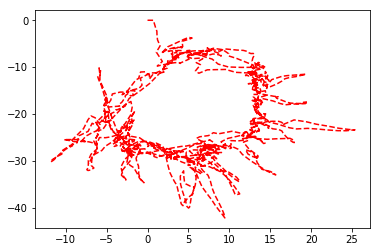

In [47]:
x, y, t = [res[3*k] for k in range(int(len(res)/3))], [res[3*k+1] for k in range(int(len(res)/3))], [res[3*k+2] for k in range(int(len(res)/3))]
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

On peut néanmoins reconnaître une forme plus cohérente de la trajectoire du robot que celle observée avec les données d'odométrie uniquement. 

## Partie 3

### Question 1

On a compris que le problème ici réside dans la non convexité de la fonction f selon les variables $\theta_{i}$, ce que l'on va chercher à corriger. Géométriquement, modifier le produit scalaire en considérent une matrice symétrique définie positive, revient à transformer l'espace en accordant plus ou moins d'importance à l'une ou l'autre des dimensions. On va donc chercher à modifier les dimensions de telle sorte que f deviennent convexe.


Fixons tous les paramètres sauf $\theta_{i}$.
Si i n'est pas engagé dans une fermeture de boucle, la dépendance de f en $\theta_{i}$ vient uniquement du terme  $ \|P_{i+1} - F(P_{i},dx_{i},dy_{i},d\theta_{i})\|² = (x_{i+1}-x_{i}-dx_{i}\cos(\theta_{i})+dy_{i}\sin(\theta_{i})² + (y_{i+1}-y_{i}-dx_{i}\sin(\theta_{i})-dy_{i}\cos(\theta_{i})² + (\theta_{i+1}-\theta_{i}-d\theta_{i})²$.





On va donc chercher à accorder plus de poids à ce troisième terme de telle sorte que les variations quadratiques de $\theta_{i}$ dans ce terme compensent les oscillations dûes au cos et au sin dans les autres termes. Comme une matrice symétrique définie positive est diagonalisable, on peut la choisir diagonale. On va donc multiplier ce troisième terme par un réel $\lambda \geqslant 0$, ce qui correspond à une dilatation de la 3i-ème composante de l'espace d'un facteur $\lambda$.

Alors, $\frac{1}{2}\frac{\partial^2 f}{\partial \theta_{i}^2}= (dx_{i}\cos(\theta_{i})-dy_{i}\sin(\theta_{i})
(x_{i+1}-x_{i}-dx_{i}\cos(\theta_{i})+dy_{i}\sin(\theta_{i}) + (dx_{i}\cos(\theta_{i})+dy_{i}\sin(\theta_{i})² + (dx_{i}\sin(\theta_{i})+dy_{i}\cos(\theta_{i})
(y_{i+1}-y_{i}-dx_{i}\sin(\theta_{i})-dy_{i}\cos(\theta_{i}) + (-dx_{i}\cos(\theta_{i})+dy_{i}\sin(\theta_{i})² + \lambda$.

Alors, pour obtenir $\frac{1}{2}\frac{\partial^2 f}{\partial \theta_{i}^2} \geqslant 0$, il suffit qu'on ait $\lambda \geqslant  (\|dx_{i}\| +\|dy_{i}\|)(4(longueur maximale du laboratoire) + 3(\|dx_{i}\| +\|dy_{i}\|)$.
Si i est engagé dans une fermture de boucle, multiplier ce terme par deux est suffisant.

Ainsi, on peut convexifier le problème en changeant de produit scalire et en travaillant avec la matrice symétrique définie positive $A=(A_{ij})_{1\leqslant i,j \leqslant 3n}$ tq A est diagonale et $A_{3k+1, 3k+1}= A_{3k+2, 3k+2} = 1$ et $A_{3k+3, 3k+3}= 2(\|dx_{k}\| +\|dy_{k}\|)(4(longueur maximale du laboratoire) + 3(\|dx_{k}\| +\|dy_{k}\|)$ par exemple.

Remarque: on travaille ici avec la longueur maximale du laboratoire car on sait que le domaine auquel aura accès le robot est borné. En pratique, on connait cette valeur. Pour notre algorithme, il suffira de chosiir une valeur suffisamment grande.


### Question 2

On commence par estimer la trajectoire à partir de l'odométrie comme précédemment

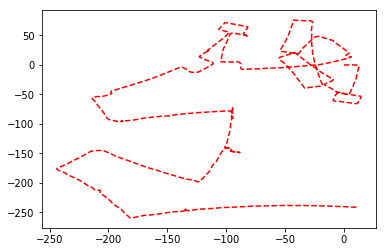

In [83]:
donnees_odo = []
donnees_loop = []         
recup_donnees("MIT.txt")
x, y, t = estim_trajectoire(donnees_odo)
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

P=[]
for i in range(len(x)):
    P.append(x[i])
    P.append(y[i])
    P.append(t[i])
P=np.array(P)

On définit donc la matrice A de telle sorte que le coefficient attribué à la différence d'angles au carrée soient la plus grande pour négliger les oscillations duent aux autres termes en cosinus et sinus. A est diagonale de taille 3 et possède un coefficient $\lambda$ arbitrairement élevé. On redéfinit ainsi la fonction norme au carrée pour l'associer à A.

In [87]:
"""m=len(donnees_odo)+1
A = np.eye(3*m)

borne_max = 10000
for k in range(m-1):
    A[3*k+2][3*k+2]= 2*(np.linalg.norm(donnees_odo[k][2][0])+np.linalg.norm(donnees_odo[k][2][1]))*4*(borne_max + 3*(np.linalg.norm(donnees_odo[k][2][0])+np.linalg.norm(donnees_odo[k][2][1])))
A[3*(m-1)+2][3*(m-1)+2]= 0



print(np.dot(P,np.dot(A,P)))"""

8195895132.987924


In [89]:
A = np.diag([1,1,1000])
def norme_carree(X):
    return np.dot(X,np.dot(A,X))

On essaie donc avec le nouveau produit scalaire sur les autres données. Comme seule la fonction norme a été modifiée précédemment, on peut réutiliser le code de la partie 2 pour essayer d'optimiser la trajectoire:

In [91]:
res3 = optim_BFGS(f_minim, grad_f_minim, P, 40, 200)

25566.09326724957
16730.115893656144
16749.386840510677
11855.676999129357
14547.417003233928
13121.334636200234
12550.125908428865
12900.122800819643
12298.267085707988
11761.898063095092
11306.704719046578
11121.677299920893
11195.698377080607
11576.404884279644
12048.607543229366
11331.641518447543
10711.858352639734
10581.317000512105
10829.577913674777
11092.072202111645
11075.578711897313
10385.509439536349
10091.95239371636
10025.231457746997
10559.43113181092
10955.440111620357
10614.469352206039
10011.938450294463
9972.170785541372
10065.587304430668
10354.320159295274
10694.642436790562
9987.49341168666
9533.12930132725
9474.45694120408
9879.07891736409
9931.716734865593
9399.295865195381
9056.133729342808
8849.345909049876
Nombre d'iterations :  40


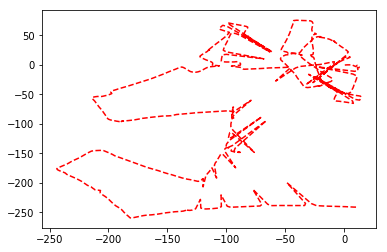

In [93]:
x, y, t = [res3[3*k] for k in range(int(len(res3)/3))], [res3[3*k+1] for k in range(int(len(res3)/3))], [res3[3*k+2] for k in range(int(len(res3)/3))]
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

On reconnait à nouveau la forme du laboratoire, avec moins de fouillis sauf en haut à droite.

### Annexe

On a en outre tenté de calculer le gradient de notre fonction à minimiser à la main pour l'utiliser dans nos algorithmes d'optimisation, en vain. Le code est le suivant:

In [ ]:
def loop_from(i):
    """
    trouve toutes les boucles qui partent de i
    """
    res = []
    for loop in donnees_loop:
        if loop[0]==i:
            res.append(loop)
    return res

def loop_to(i):
    """
    trouve toutes les boucles qui arrivent en i
    """
    res = []
    for loop in donnees_loop:
        if loop[1]==i:
            res.append(loop)
    return res

def grad_partiel(x_i,y_i,theta_i,x_i_prec,y_i_prec,theta_i_prec,dx_i_prec,dy_i_prec,dtheta_i_prec):
    grad_x = 2*x_i*(x_i - cos(theta_i_prec)*dx_i_prec + sin(theta_i_prec)*dy_i_prec - x_i_prec)
    grad_y = 2*y_i*(y_i - sin(theta_i_prec)*dx_i_prec - cos(theta_i_prec)*dx_i_prec - y_i_prec)
    grad_theta = 2*theta_i*(theta_i - dtheta_i_prec - theta_i_prec)
    return grad_x,grad_y,grad_theta
    

def grad_f_minim(P):
    odo = donnees_odo
    loop = donnees_loop
    n = len(P)//3
    grad = [0,0,0]   #Le gradient au premier point est toujours nul car on a pris (x,y,theta)_0 = (0,0,0)
    for i in range(1,n):
        grad_x = 0
        grad_y = 0
        grad_theta = 0
        #On commence par ajouter la partie liée à l'odométrie
        x_i = P[3*i]
        y_i = P[3*i+1]
        theta_i = P[3*i+2]
        x_i_prec = P[3*(i-1)]
        y_i_prec = P[3*(i-1)+1]
        theta_i_prec = P[3*(i-1)+2]
        dx_i_prec = odo[i-1][2][0]
        dy_i_prec = odo[i-1][2][1]
        dtheta_i_prec = odo[i-1][2][2]
        g_x,g_y,g_theta = grad_partiel(x_i,y_i,theta_i,x_i_prec,y_i_prec,theta_i_prec,dx_i_prec,dy_i_prec,dtheta_i_prec)
        grad_x += g_x
        grad_y += g_y
        grad_theta += g_theta
        if i<n-2:
            x_i_suiv = P[3*(i+1)]
            y_i_suiv = P[3*(i+1)+1]
            theta_i_suiv = P[3*(i+1)+2]
            dx_i = odo[i][2][0]
            dy_i = odo[i][2][1]
            dtheta_i = odo[i][2][2]
            dx_i_suiv = odo[i+1][2][0]
            dy_i_suiv = odo[i+1][2][1]
            dtheta_i_suiv = odo[i+1][2][2]
            g_x,g_y,g_theta = grad_partiel(x_i_suiv,y_i_suiv,theta_i_suiv,x_i,y_i,theta_i,dx_i,dy_i,dtheta_i)
            grad_x -= g_x
            grad_y -= g_y
            grad_theta -= g_theta
            grad_theta += 2*(-sin(theta_i)*dx_i-cos(theta_i)*dy_i)*(x_i_suiv - cos(theta_i)*dx_i + sin(theta_i)*dy_i - x_i)
            grad_theta += 2*(cos(theta_i)*dx_i-sin(theta_i)*dy_i)*(y_i_suiv - sin(theta_i)*dx_i - cos(theta_i)*dx_i - y_i)
        #On ajoute ensuite la partie liée aux boucles
        l_f = loop_from(i)
        for k in l_f:
            x_k = P[3*int(k[1])]
            y_k = P[3*int(k[1])+1]
            theta_k = P[3*int(k[1])+2]
            dx_k = k[2][0]
            dy_k = k[2][1]
            dtheta_k = k[2][2]
            g_x,g_y,g_theta = grad_partiel(x_k,y_k,theta_k,x_i,y_i,theta_i,dx_k,dy_k,dtheta_k)
            grad_x -= g_x
            grad_y -= g_y
            grad_theta -= g_theta
            grad_theta += 2*(-sin(theta_i)*dx_k-cos(theta_i)*dy_k)*(x_k - cos(theta_i)*dx_k + sin(theta_i)*dy_k - x_i)
            grad_theta += 2*(cos(theta_i)*dx_k-sin(theta_i)*dy_k)*(y_k - sin(theta_i)*dx_k - cos(theta_i)*dx_k - y_i)
        l_t = loop_to(i)
        for k in l_f:
            x_k = P[3*int(k[0])]
            y_k = P[3*int(k[0])+1]
            theta_k = P[3*int(k[0])+2]
            dx_k = k[2][0]
            dy_k = k[2][1]
            dtheta_k = k[2][2]
            g_x,g_y,g_theta = grad_partiel(x_i,y_i,theta_i,x_k,y_k,theta_k,dx_k,dy_k,dtheta_k)
            grad_x += g_x
            grad_y += g_y
            grad_theta += g_theta
        grad.append(grad_x)
        grad.append(grad_y)
        grad.append(grad_theta)
    return np.array(grad)
